# more EDA... Explore geographical distribution of data aftrer filtering by feature
### Note that at this point in development I noticed that some of the audio clips in the database are duplicated, so these are cleaned out. 

-  In this notebook I found that the data is clustered into three main areas: there is a cluster in the Yukon, one in Alberta and one in Ontario. 

The yukon data is comprised entirely of mp3 recordings whereas the other two have a mixture of flac and mp3 files. 



In [1]:
import sys
sys.path.append('../../src')

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import data.clean_csv
from utils import *

%conda install geopandas -y
import geopandas as gpd
# process the raw csv file (optional)
# clean_csv.process_raw_csv()

%load_ext autoreload
%autoreload 2

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.9.0
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.10.0



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
data_path = Path('../../data')
df_full = pd.read_pickle(data_path / 'interim' / 'processed_metadata.pkl')
df_full.columns

Index(['organization', 'project', 'project_id', 'location', 'location_id',
       'recording_date_time', 'recording_id', 'task_method', 'task_id',
       'aru_task_status', 'species_code', 'species_common_name',
       'species_scientific_name', 'species_class', 'detection_time',
       'task_duration', 'tag_duration', 'min_tag_freq', 'max_tag_freq',
       'tag_id', 'individual_order', 'vocalization', 'abundance', 'tag_rating',
       'tag_is_verified', 'clip_channel_used', 'observer', 'observer_id',
       'verifier_id', 'left_full_freq_tag_rms_peak_dbfs',
       'left_full_freq_tag_rms_trough_dbfs', 'left_full_freq_tag_pk_count',
       'left_full_freq_tag_dc_offset', 'left_full_freq_tag_min_level',
       'left_full_freq_tag_max_level', 'left_full_freq_tag_peak_level_dbfs',
       'left_freq_filter_tag_rms_peak_dbfs',
       'left_freq_filter_tag_rms_trough_dbfs', 'left_freq_filter_tag_pk_count',
       'left_freq_filter_tag_dc_offset', 'left_freq_filter_tag_min_level',
       'lef

In [3]:

keep_cols = ['organization', 'project', 'project_id', 'recording_id', 'recording_date_time', 'species_code', 'species_common_name', 'detection_time', 'task_duration', 'tag_duration', 'tag_id', 'clip_url', 'recording_url', 'latitude', 'longitude', 'file_type']
df = df_full[keep_cols]

In [4]:
display_all(df_full.head())


,organization,project,project_id,location,location_id,recording_date_time,recording_id,task_method,task_id,aru_task_status,species_code,species_common_name,species_scientific_name,species_class,detection_time,task_duration,tag_duration,min_tag_freq,max_tag_freq,tag_id,individual_order,vocalization,abundance,tag_rating,tag_is_verified,clip_channel_used,observer,observer_id,verifier_id,left_full_freq_tag_rms_peak_dbfs,left_full_freq_tag_rms_trough_dbfs,left_full_freq_tag_pk_count,left_full_freq_tag_dc_offset,left_full_freq_tag_min_level,left_full_freq_tag_max_level,left_full_freq_tag_peak_level_dbfs,left_freq_filter_tag_rms_peak_dbfs,left_freq_filter_tag_rms_trough_dbfs,left_freq_filter_tag_pk_count,left_freq_filter_tag_dc_offset,left_freq_filter_tag_min_level,left_freq_filter_tag_max_level,left_freq_filter_tag_peak_level_dbfs,right_full_freq_tag_rms_peak_dbfs,right_full_freq_tag_rms_trough_dbfs,right_full_freq_tag_pk_count,right_full_freq_tag_dc_offset,right_full_freq_tag_min_level,right_full_freq_tag_max_level,right_full_freq_tag_peak_level_dbfs,right_freq_filter_tag_rms_peak_dbfs,right_freq_filter_tag_rms_trough_dbfs,right_freq_filter_tag_pk_count,right_freq_filter_tag_dc_offset,right_freq_filter_tag_min_level,right_freq_filter_tag_max_level,right_freq_filter_tag_peak_level_dbfs,tagged_in_wildtrax,media_url,spectrogram_url,clip_url,sensorId,tasks,status,recording_url,latitude,longitude,location_buffer_m,file_type
1623,BU,Alberta Archetypes,1501,P-E0-1-10,308678,2022-06-05 06:51:00,416962,nan,596169,Transcribed,OVEN,Ovenbird,SEIURUS AUROCAPILLA,Aves,67.8,180.0,3.94,1.08kHz,11.38kHz,3212415,1.0,Song,1,NaN,f,1.0,Alex MacPhail,15,-1,-19.20,-45.60,2.0,0.000014,-0.392700,0.398468,-7.99,-19.21,-57.44,2.0,0.000000,-0.399567,0.387360,-7.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,357,Active,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,52.644040,-115.140510,NaN,flac
1624,BU,Alberta Archetypes,1501,P-E0-1-10,308678,2022-06-05 06:51:00,416962,nan,596169,Transcribed,OVEN,Ovenbird,SEIURUS AUROCAPILLA,Aves,67.8,180.0,3.94,1.08kHz,11.38kHz,3212415,1.0,Song,1,NaN,f,1.0,Alex MacPhail,15,-1,-19.20,-45.60,2.0,0.000014,-0.392700,0.398468,-7.99,-19.21,-57.44,2.0,0.000000,-0.399567,0.387360,-7.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,357,Active,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,52.644040,-115.140510,NaN,flac
1625,BU,Alberta Archetypes,1501,P-E0-1-10,308678,2022-06-05 06:51:00,416962,nan,596169,Transcribed,OVEN,Ovenbird,SEIURUS AUROCAPILLA,Aves,67.8,180.0,3.94,1.08kHz,11.38kHz,3212415,1.0,Song,1,NaN,f,1.0,Alex MacPhail,15,-1,-19.20,-45.60,2.0,0.000014,-0.392700,0.398468,-7.99,-19.21,-57.44,2.0,0.000000,-0.399567,0.387360,-7.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,357,Active,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,52.644040,-115.140510,NaN,flac
1752,BU,Amplitude Quality Testing 2020,293,AM-403-SE2,36043,2017-06-15 04:46:00,92051,nan,87956,Transcribed,LINO,Light continuous industrial noise,nan,Abiotic,0.0,180.0,4.05,0.00kHz,2.10kHz,1462249,1.0,Song,1,NaN,f,2.0,Brandon Law,22,-1,-31.23,-41.36,2.0,0.000032,-0.068624,0.064758,-23.27,-31.79,-42.37,2.0,0.000014,-0.053301,0.052177,-25.47,-29.25,-39.74,2.0,0.000028,-0.081295,0.076209,-21.8,-29.79,-40.6,2.0,0.000009,-0.069424,0.063139,-23.17,t,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,174,Published - Private,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,5

Check some assumptions about the data: 

In [5]:
# 1. all the clip ids are unique
df_full.tag_id.value_counts()

tag_id
2301628    7
2232735    7
2232727    7
2232731    7
2232728    7
          ..
2557730    1
2557729    1
2557728    1
2557727    1
3339448    1
Name: count, Length: 544399, dtype: int64

In [8]:
df.loc[df['tag_id'] == 2301628].clip_url.values

array(['https://wildtrax-aru.s3.us-west-2.amazonaws.com/7ffbd831-4e4d-4877-acf3-aecebadc2593/6bedf76801f14d9882ee73f81edc472f.mp3',
       'https://wildtrax-aru.s3.us-west-2.amazonaws.com/7ffbd831-4e4d-4877-acf3-aecebadc2593/6bedf76801f14d9882ee73f81edc472f.mp3',
       'https://wildtrax-aru.s3.us-west-2.amazonaws.com/7ffbd831-4e4d-4877-acf3-aecebadc2593/6bedf76801f14d9882ee73f81edc472f.mp3',
       'https://wildtrax-aru.s3.us-west-2.amazonaws.com/7ffbd831-4e4d-4877-acf3-aecebadc2593/6bedf76801f14d9882ee73f81edc472f.mp3',
       'https://wildtrax-aru.s3.us-west-2.amazonaws.com/7ffbd831-4e4d-4877-acf3-aecebadc2593/6bedf76801f14d9882ee73f81edc472f.mp3',
       'https://wildtrax-aru.s3.us-west-2.amazonaws.com/7ffbd831-4e4d-4877-acf3-aecebadc2593/6bedf76801f14d9882ee73f81edc472f.mp3',
       'https://wildtrax-aru.s3.us-west-2.amazonaws.com/7ffbd831-4e4d-4877-acf3-aecebadc2593/6bedf76801f14d9882ee73f81edc472f.mp3'],
      dtype=object)

# The clips aren't all unique. Build a function to ensure that the database only contains unique clips and recordings to avoid data leakage. 

/Users/mikeg/code/machine_learning/osfl_cnn_recognizer/notebooks/exploratory_nbs/../../src/utils.py:50: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  canada = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")).query(
/Users/mikeg/code/machine_learning/osfl_cnn_recognizer/notebooks/exploratory_nbs/../../src/utils.py:70: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  points.plot(
/Users/mikeg/miniforge3/envs/osfl2/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


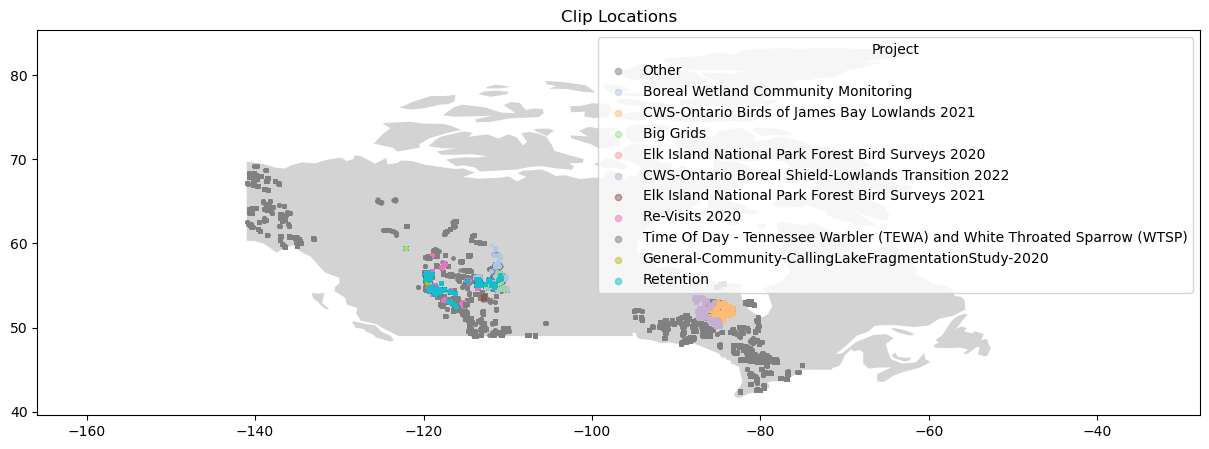

,project_id,recording_id,detection_time,task_duration,tag_duration,tag_id,latitude,longitude
count,1.097135e+06,1.097135e+06,1.097135e+06,1.097135e+06,1.097135e+06,1.097135e+06,1.079860e+06,1.079860e+06
mean,6.761033e+02,2.740676e+05,7.707722e+01,2.563827e+02,2.403144e+00,2.156266e+06,5.402917e+01,-1.078665e+02
std,5.519733e+02,1.946405e+05,1.121438e+02,1.985905e+02,1.484645e+00,8.881851e+05,3.117030e+00,1.297872e+01
min,2.000000e+00,3.557000e+03,0.000000e+00,4.134000e+01,6.000000e-02,1.708400e+04,4.236354e+01,-1.409624e+02
25%,1.500000e+02,1.376920e+05,6.860000e+00,1.800000e+02,1.490000e+00,1.484392e+06,5.308726e+01,-1.144878e+02
50%,6.620000e+02,2.117120e+05,3.431000e+01,1.800000e+02,2.050000e+00,2.288918e+06,5.370755e+01,-1.128401e+02
75%,1.092000e+03,3.822160e+05,1.086500e+02,3.000000e+02,2.990000e+00,2.774890e+06,5.534908e+01,-1.107555e+02
max,2.044000e+03,8.290150e+05,5.990900e+02,6.000000e+02,5.496000e+01,3.528574e+06,6.923258e+01,-7.510290e+01


In [9]:
def filter_duplicate_clips(df: pd.DataFrame) -> pd.DataFrame:
    """Filter out duplicate clips based on tag_id"""
    return df.loc[df.tag_id.drop_duplicates().index]

plot_locations(df)
print_stats(df)

In [10]:
df = filter_duplicate_clips(df)

In [40]:
df.tag_id.value_counts()[:3]

tag_id
3212415    1
1166586    1
1166582    1
Name: count, dtype: int64

In [41]:
len(df),  df.tag_id.nunique(), df.recording_url.nunique(), df.clip_url.nunique()

(544399, 544399, 67927, 544399)

68000 recordings create 544,400 tags. 

# To create a test set, select 20% of the data to remove from the dataset. 
This should be representative of the entire training dataset. Additionally we want to evaluate how the model will generalise to new locations. 
- To achieve this split, one option is to apply a grid to the map, and filter out 20% of the database at the recording level. Then make sure that the recordings which were selected also account for around 20% of the olive sided flycatcher clips. It might be necessary to split the data differently. 
TODO
- Look at a table of osfl tags per recording


In [11]:
osfls = df.loc[df.species_code == 'OSFL']
len(osfls)

5085

In [13]:
df.columns

Index(['organization', 'project', 'project_id', 'recording_id',
       'recording_date_time', 'species_code', 'species_common_name',
       'detection_time', 'task_duration', 'tag_duration', 'tag_id', 'clip_url',
       'recording_url', 'latitude', 'longitude', 'file_type'],
      dtype='object')

/Users/mikeg/code/machine_learning/osfl_cnn_recognizer/notebooks/exploratory_nbs/../../src/utils.py:50: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  canada = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")).query(
/Users/mikeg/code/machine_learning/osfl_cnn_recognizer/notebooks/exploratory_nbs/../../src/utils.py:70: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  points.plot(
/Users/mikeg/code/machine_learning/osfl_cnn_recognizer/notebooks/exploratory_nbs/../../src/utils.py:70: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  points.plot(


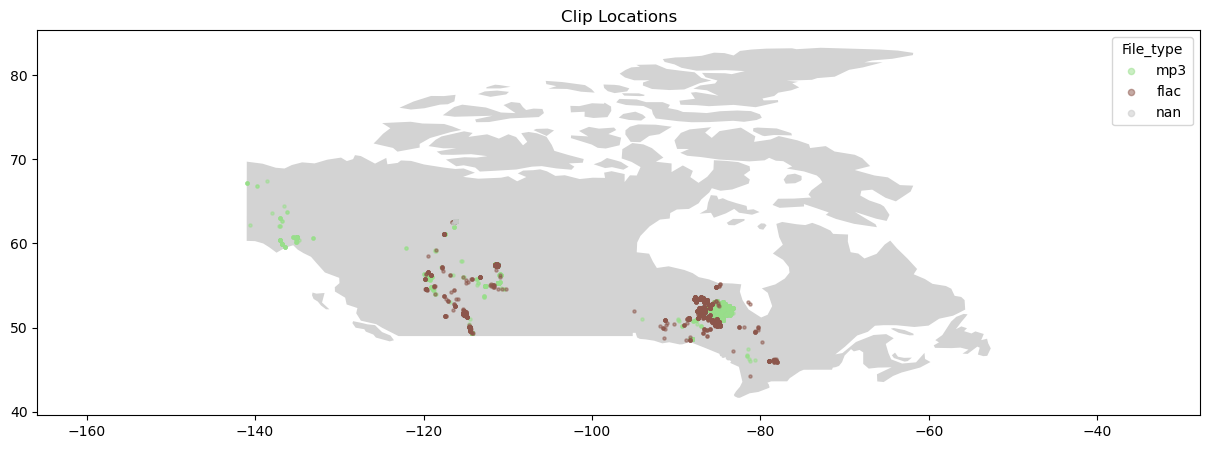

/Users/mikeg/code/machine_learning/osfl_cnn_recognizer/notebooks/exploratory_nbs/../../src/utils.py:50: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  canada = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")).query(
/Users/mikeg/code/machine_learning/osfl_cnn_recognizer/notebooks/exploratory_nbs/../../src/utils.py:70: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  points.plot(
/Users/mikeg/code/machine_learning/osfl_cnn_recognizer/notebooks/exploratory_nbs/../../src/utils.py:70: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  points.plot(


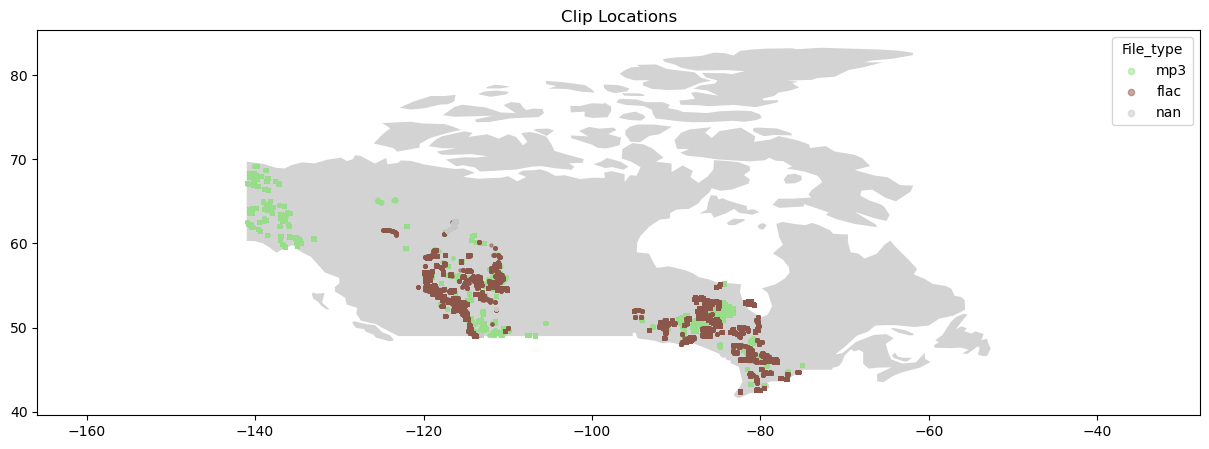

(None, None)

In [19]:
plot_locations(osfls, 'file_type'), plot_locations(df, 'file_type')

# All of the recordings made in the Yukon are mp3 files. Filtering out all the mp3 files would also introduce a spatial bias in the dataset. 

In [45]:
osfls.loc[osfls.latitude == osfls.latitude.max()]

,organization,project,project_id,recording_id,recording_date_time,species_code,species_common_name,detection_time,task_duration,tag_duration,tag_id,clip_url,recording_url,latitude,longitude,file_type
2346567,CWS-NOR,YT Boreal Monitoring Program CWS Northern Regi...,285,140875,2019-05-25 03:00:00,OSFL,Olive-sided Flycatcher,14.51,180.0,1.04,1357905,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,67.40775,-138.64234,mp3


In [21]:
df_lite = df.sample(1000)
osfls_lite = df_lite.loc[df_lite.species_code == 'OSFL']

Re-factored 

In [47]:
def _plot_locations_with_legend(df, feature='project', title='Clip Locations', num_features=10, forced_features: list=[None]):
    """
    Plot points from a DataFrame on a map of Canada with a colour legend.
    The points will be coloured based on the top n unique values in the features column.

    Parameters: 
    - df: DataFrame or GeoDataFrame with 'latitude' and 'longitude' and other feature columns. 
    - features: the name of the column used to colour the points.
    - title: the title of plot
    - num_classes: the number of unique values in the features column to plot.
    - forced_classes: additional classes to include in the plot regardless of their count in the features column.
    """
    # Convert DataFrame to GeoDataFrame if needed
    if not isinstance(df, gpd.GeoDataFrame):
        df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

    # Load Canada map
    canada = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")).query("name == 'Canada'")
    
    # Determine feature labels for coloring
    top_features = df[feature].value_counts().nlargest(num_features).index.to_list()
    all_features =   ['Other'] + top_features + forced_features
    df['_color'] = df[feature].where(df[feature].isin(all_features), 'Other')

    # Create colormap
    color_map = plt.cm.get_cmap('tab20', len(all_features))
    
    # Plot base map
    fig, ax = plt.subplots(figsize=(15, 5))
    canada.plot(color='lightgrey', ax=ax)
    
    # Plot points with legend
    for i, feature_label in enumerate(all_features):
        color = 'grey' if feature_label == 'Other' else color_map(i)
        points = df[df['_color'] == feature_label]
        points.plot(ax=ax, marker='o', color=color, label=feature_label, markersize=5, alpha=0.5)

    # Set aspect to equal for maintaining scale
    ax.set_aspect('equal', adjustable='datalim')

    # Customize and show plot
    ax.set_title(title)
    ax.legend(title=feature.capitalize(), markerscale=2)
    plt.show()

    # Example usage
    # plot_locations_with_legend(df_lite, feature='species_code', num_features=10, forced_features=['OSFL'])


/Users/mikeg/code/machine_learning/osfl_cnn_recognizer/notebooks/exploratory_nbs/../../src/utils.py:50: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  canada = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")).query(
/Users/mikeg/code/machine_learning/osfl_cnn_recognizer/notebooks/exploratory_nbs/../../src/utils.py:70: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  points.plot(


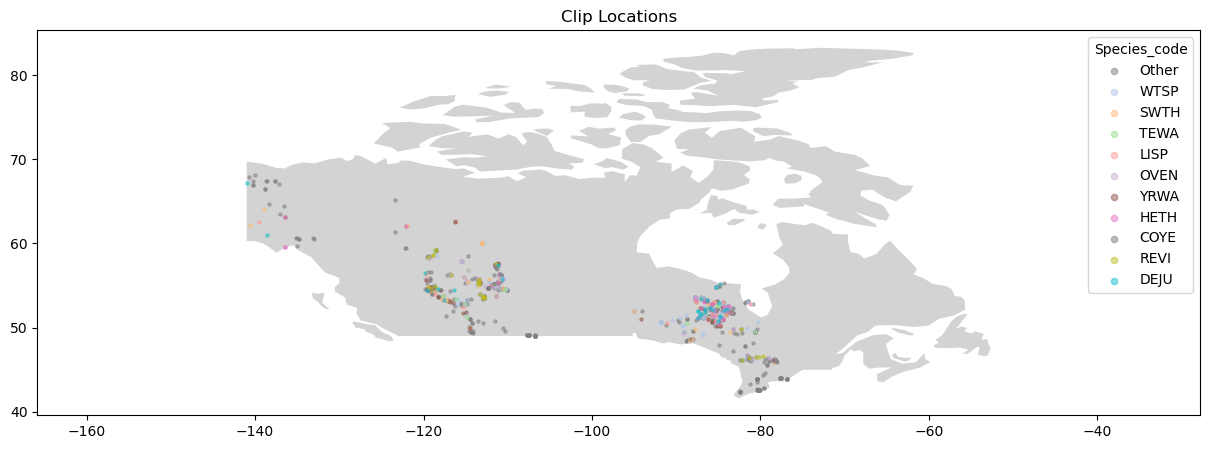

/Users/mikeg/code/machine_learning/osfl_cnn_recognizer/notebooks/exploratory_nbs/../../src/utils.py:50: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  canada = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")).query(
/Users/mikeg/code/machine_learning/osfl_cnn_recognizer/notebooks/exploratory_nbs/../../src/utils.py:70: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  points.plot(
/Users/mikeg/code/machine_learning/osfl_cnn_recognizer/notebooks/exploratory_nbs/../../src/utils.py:70: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  points.plot(


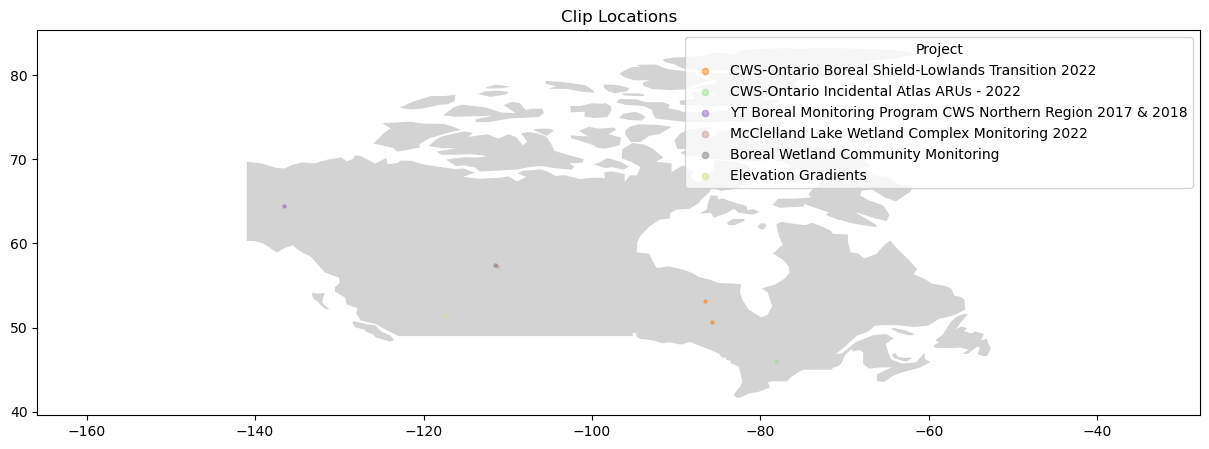

(None, None, 7)

In [24]:
plot_locations(df_lite, 'species_code'), plot_locations(osfls_lite), len(osfls_lite)

In [50]:
# reformat the df so that unique recording_urls are shown, and the species_code and recording_date_time are also shown

df.groupby('recording_id').count()


,organization,project,project_id,recording_date_time,species_code,species_common_name,detection_time,task_duration,tag_duration,tag_id,clip_url,recording_url,latitude,longitude,file_type
recording_id,,,,,,,,,,,,,,,
3557,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
3560,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
3562,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
3564,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
3567,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826381,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
826382,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
826383,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
